In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]

# 確率分布(probability distribution)
statsライブラリから確率分布を呼び出す方法  
`stats.<確率分布>.<メソッド>()`  
<確率分布>には、正規分布(norm)、一様分布(uniform(連続),randint(整数だけ))、binorm(二項分布)、poisson(ポアソン分布)、expon(指数分布)などが入る  


### 一様分布からランダムにデータを生成する
rvs :random variants(確率変量) の略

In [2]:
# 以下のようにすると、サイコロのように、1~6の値を一様に生成することができる
stats.randint.rvs(1, 7)

1

In [3]:
# uniformを用いると、連続したランダムな値を生成できる
stats.uniform(0,1).rvs()

0.26599635632776153

## 離散型確率変数と連続型確率変数
とびとびの値をとる確率変数 => **離散型確率変数**  
ex) サイコロを振って出た目  
この分布を表す関数を**確率質量関数(PMF: Probability Mass Function)**  
連続の値をとる確率変数 => **連続確率変数**  
ex) ランダムに選んだ成人男性の身長. 
この分布を表す関数を**確率密度関数(PDF: Probability Density Function)**  

### 一様分布を描画する

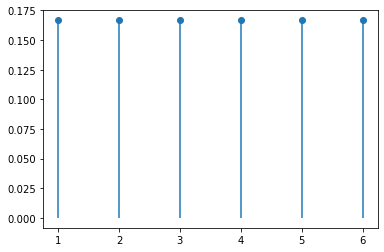

In [4]:
# 離散型
x = np.arange(1, 7) # arange は array range の略
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

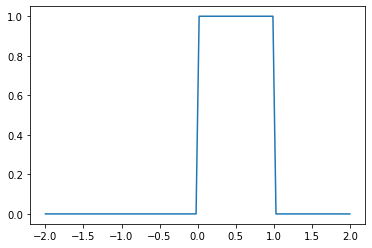

In [5]:
# 連続型
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## 累積分布関数 (CDF Cumulative Distribution Function)
確率分布関数を負の無限大からある値xまで確率を積み上げた値を返す関数  
確率分布関数は範囲を指定して積分することで確率を求める必要があったが、累積分布関数は、負の無限大から指定の値までの確率をすぐに返してくれる(指定の値から左側の面積を返すということ)  
CDFを描画すると、複数の分布の差異を視覚的に理解できるというメリットがある

正の無限大からある値xまでを積み上げた値を返す関数(1 - CDF)は、**Survival Function**と呼ばれる

### 正規分布のPDF(Probability Density Function)とCDFを描画する

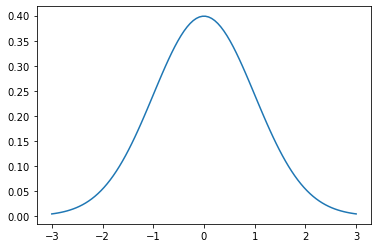

In [6]:
# pdf
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

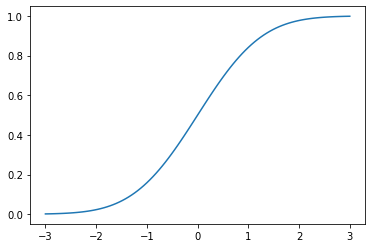

In [7]:
# cdf
x = np.linspace(-3, 3, 100)
y = stats.norm.cdf(x)
plt.plot(x, y)

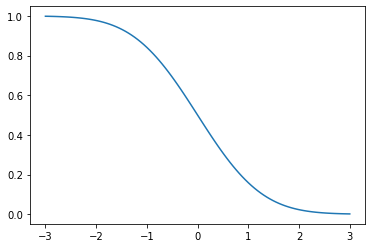

In [8]:
# sf(survival function) (1-CDFであり、CDFの左右対称のグラフを返す)
x = np.linspace(-3, 3, 100)
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

In [20]:
# 平均10,標準偏差2の正規分布からランダムに値を取り出す
stats.norm(loc=10, scale=3).rvs()

12.770050709587917

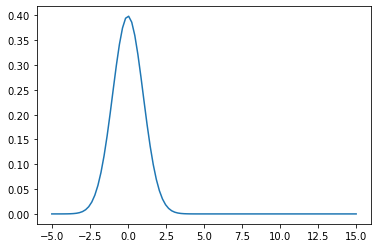

In [15]:
# 何も指定しない場合はloc=0, scale=1 の標準正規分布となる
y = stats.norm().pdf(x)
plt.plot(x, y)

## カーネル密度推定(KDE: Kernel Density Estimation)
観測した分布(データ)から、その背後にある確率密度関数(確率分布)を推定する  
個々のデータに予測する分布(多くの場合正規分布)を割り当て、その分布を足し合わせることで確率密度関数を推定する  
この時、個々のデータに割り当てられたそれぞれの確率分布を**カーネル**と呼ぶ。よって、カーネル密度推定はカーネルを足し合わせることで行う。

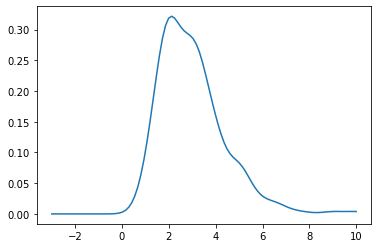

In [23]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df["tip"]).pdf(x)
plt.plot(x, y)

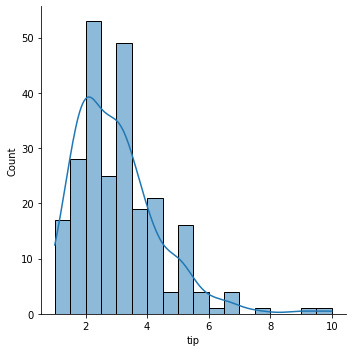

In [26]:
# ヒストグラムが実際に標本から観測されたデータ。kdeが、そのヒストグラムから推定されたヒストグラムの背後にある確率分布(kde)
sns.displot(df["tip"], kde=True)

得られたKDEから、そのサンプル以外のデータを予想できる！！
ある特定の日のチップのデータをから予想したKDEをグラフに示し他。
こKDEから明日のチップについて予想できるのがKDEのすごいところ！、